In [1]:
import random
import matplotlib.pyplot as plt
import math

In [2]:
a = []
max_possible_random = int(input("Enter maximum possible number: "))
min_possible_random = int(input("Enter minimum possible number: "))
random_number_length = int(input("Enter length: "))

Enter maximum possible number:  15
Enter minimum possible number:  12
Enter length:  100


In [3]:
for i in range(random_number_length):
    a.append(random.randint(min_possible_random, max_possible_random))
print(a)

[13, 15, 15, 15, 14, 15, 14, 14, 14, 15, 14, 12, 15, 12, 12, 13, 12, 12, 14, 14, 12, 14, 13, 14, 12, 15, 12, 13, 15, 13, 14, 12, 14, 14, 14, 13, 13, 14, 12, 14, 13, 15, 13, 13, 14, 14, 14, 14, 14, 13, 13, 15, 12, 14, 12, 14, 15, 12, 15, 15, 14, 14, 13, 14, 13, 13, 14, 12, 12, 14, 13, 14, 12, 14, 13, 14, 13, 12, 14, 15, 13, 14, 15, 14, 14, 13, 15, 15, 12, 14, 14, 15, 13, 15, 14, 12, 13, 12, 15, 12]


In [4]:
def sort_list(lst):
    for i in range(0, len(lst)-1):
        for j in range(len(lst)-1):
            if (lst[j] > lst[j+1]):
                lst[j], lst[j+1] = lst[j+1], lst[j]
    return lst

In [5]:
print("Варіаційний ряд")
print(sort_list(a))

Варіаційний ряд
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]


In [6]:
def is_in_list(to_find, lst):
    for i in lst:
        if to_find == i:
            return True
    return False

In [7]:
def convert_to_set(lst):
    to_return = []
    for i in lst:
        if not is_in_list(i, to_return):
            to_return.append(i)
    return to_return

In [8]:
def number_of_times_occurs(element, lst):
    counter = 0
    for i in lst:
        if element == i:
            counter += 1
    return counter

In [9]:
def print_frequency_table(distinct_values_list, counts):
    print("Частотна таблиця")
    print("Xi\t\tNi")
    for i in range(len(distinct_values_list)):
        print(str(distinct_values_list[i]) + "\t|\t" + str(counts[i]))

In [10]:
distinct_values = sort_list(convert_to_set(a))

counts = []
for i in distinct_values:
    counts.append(number_of_times_occurs(i, a))

print_frequency_table(distinct_values, counts)

Частотна таблиця
Xi		Ni
12	|	21
13	|	22
14	|	37
15	|	20


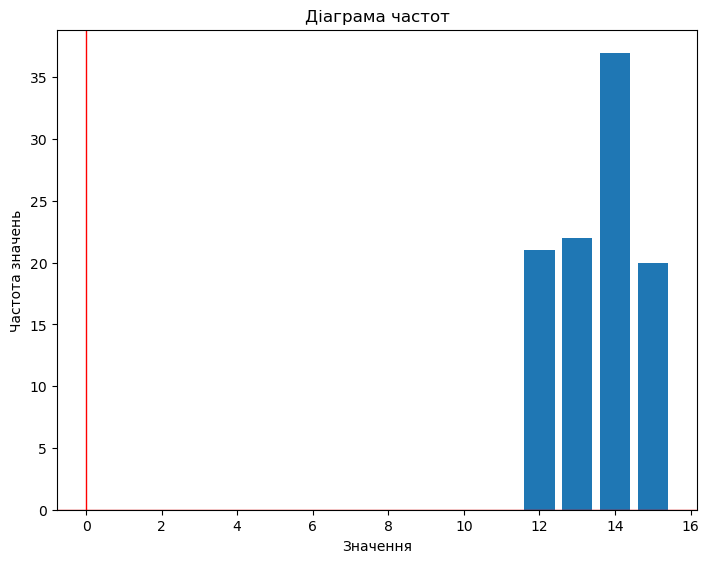

In [11]:
#побудова діаграми частот
value = convert_to_set(a)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(value, counts)

ax.axhline(y=0, color='red', linewidth=1)
ax.axvline(x=0, color='red', linewidth=1)

ax.set_title('Діаграма частот')
ax.set_ylabel('Частота значень')
ax.set_xlabel('Значення')

plt.show()

Представити графічно статистичний матеріал


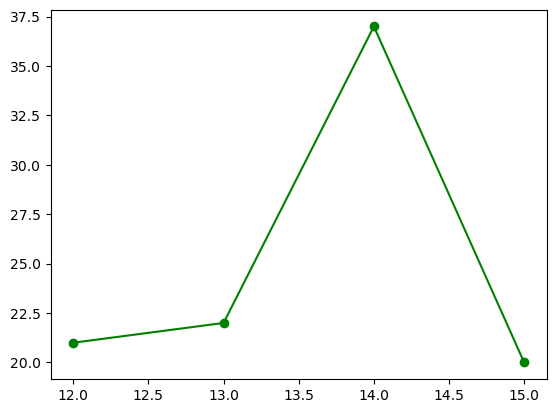

In [12]:
print("Представити графічно статистичний матеріал")
plt.plot(distinct_values, counts, marker='o', color='g')
plt.show()

In [13]:
def print_empirical_function(probabilities, distinct_v):
    print(str(probabilities[0]) + ", x < " + str(distinct_v[0]))

    for i in range(1, (len(distinct_v))):
        print(str(probabilities[i]) + ", " + str(distinct_v[i-1]) + " <= x < " + str(distinct_v[i]))

    print(str(probabilities[-1]) + ", x >= " + str(distinct_v[-1]))

In [14]:
def find_probabilities(a, counts):
    probabilities = []
    start = 0
    for i in counts:
        probabilities.append(start)
        start += i/len(a)
    probabilities.append(start)
    
    return probabilities

In [15]:
probabilities = find_probabilities(a, counts)

In [16]:
print("Задати аналітично та побудувати емпіричну функцію розподілу")
print()
print("Аналітично: ")
print_empirical_function(probabilities, distinct_values)

Задати аналітично та побудувати емпіричну функцію розподілу

Аналітично: 
0, x < 12
0.21, 12 <= x < 13
0.43, 13 <= x < 14
0.8, 14 <= x < 15
1.0, x >= 15


In [17]:
def show_plot(distinct_v, probs):
    p1, p2 = [distinct_v[0], distinct_v[0]], [probs[0], probs[0]]
    plt.plot(p1, p2)

    for i in range(1, len(distinct_v)):
        p3, p4 = [distinct_v[i-1], distinct_v[i]], [probs[i], probs[i]]
        plt.plot(p3, p4)

    p5, p6 = [distinct_v[-1]+5, distinct_v[-1]], [probs[-1], probs[-1]]
    plt.plot(p5, p6)

    for i in range(1, len(distinct_v)+1):
        p7, p8 = [distinct_v[i-1], distinct_v[i-1]], [probs[i], 0]
        plt.plot(p7, p8, linestyle = 'dashed')

    p9, p10 = [0, distinct_v[-1]+5], [0, 0]
    plt.plot(p9, p10)

    plt.show()


Графічно: 



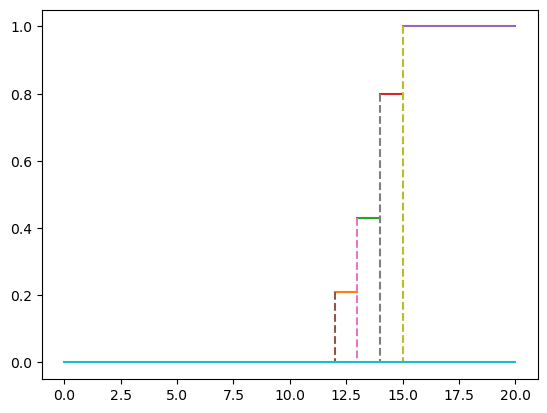

In [18]:
print()
print("Графічно: ")
print()

show_plot(distinct_values, probabilities)

In [19]:
#медіана
def find_median(a):
    a_len = len(a)
    return (a[a_len//2-1] + a[a_len//2]) / 2 if a_len % 2 == 0 else a[a_len//2]

In [20]:
def find_max(a):
    _max = a[0]
    for i in a:
        if i > _max:
            _max = i
    return _max

In [21]:
def find_min(a):
    _min = a[0]
    for i in a:
        if i < _min:
            _min = i
    return _min

In [22]:
#мода
def find_moda(lst, counts, distinct_v):
    to_return = []
    for i in range(len(counts)):
        if counts[i] == find_max(counts):
            to_return.append(distinct_v[i])
    return to_return

In [23]:
#вибіркове середнє
def average_(distinct_v, counts):
    to_return = 0
    for i in range(len(distinct_v)):
        to_return += (distinct_v[i] * counts[i])
    return to_return/sum_(counts)

In [24]:
#розмах
def scope(distinct_v):
    return find_max(distinct_v) - find_min(distinct_v)

In [25]:
#сума
def sum_(lst):
    to_return = 0
    for i in lst:
        to_return += i
    return to_return

In [26]:
#девіація
def deviation(distinct_v, counts):
    to_return = 0
    avg = average_(distinct_v, counts)
    for i in range(len(distinct_v)):
        to_return += (((distinct_v[i] - avg) ** 2) * counts[i])
    return to_return

In [27]:
#варіанса
def variance(distinct_v, counts):
    return deviation(distinct_v, counts)/(sum_(counts)-1)

In [28]:
#стандарт
def standart(distinct_v, counts):
    return math.sqrt(variance(distinct_v, counts))

In [29]:
#варіація
def variation(distinct_v, counts):
    return standart(distinct_v, counts) / average_(distinct_v, counts)

In [30]:
#вибіркова дисперсія
def selective_dispersion(distinct_v, counts):
    return deviation(distinct_v, counts)/sum_(counts)

In [31]:
#вибіркове середнє квадратичне відхилення
def selective_average_quadratic_deviation(distinct_v, counts):
    return math.sqrt(selective_dispersion(distinct_v, counts))

In [32]:
#центральний момент k-того порядку
def m_k(k, distinct_v, counts):
    to_return = 0
    _avg = average_(distinct_v, counts)
    for i in range(len(distinct_v)):
        to_return += ((distinct_v[i] - _avg) ** k) * counts[i]
    return to_return/sum_(counts)

In [33]:
#асиметрія
def asymetry(distinct_v, counts):
    return m_k(3, distinct_v, counts) / (m_k(2, distinct_v, counts) ** (3/2))

In [34]:
#ексцес
def excess(distinct_v, counts):
    return m_k(4, distinct_v, counts) / (m_k(2, distinct_v, counts) ** (2)) - 3

In [35]:
def get_quantiles(a):
    data = {(4, "Квартил"): [], (8, "Октил"): [], (10, "Децил"): [],
            (100, "Центил"): [], (1000, "Міліл"): []}

    for k in data.keys():
        if len(a) % k[0] == 0:
            data[k] = [a[int(len(a) / k[0] * (i + 1))] for i in range(k[0] - 1)]

    for k, v in data.items():
        if v:
            print(f"{k[1]}і: {v}")
            print(f"Інтер{k[1].lower()}ьна широта: {v[len(v) - 1] - v[0]}\n")

In [36]:
print("Числові характеристики (дискретний розподіл):")
print("Медіана: " + str(find_median(a)))
print("Мода: " + str(find_moda(a, counts, distinct_values)))
print("Вибіркове середнє значення: " + str(average_(distinct_values, counts)))
print("Розмах: " + str(scope(distinct_values)))
print("Девіація: " + str(deviation(distinct_values, counts)))
print("Варіанса: " + str(variance(distinct_values, counts)))
print("Стандарт: " + str(standart(distinct_values, counts)))
print("Варіація: " + str(variation(distinct_values, counts)))
print("Вибіркова дисперсія: " + str(selective_dispersion(distinct_values, counts)))
print("Вибіркове середнє квадратичне відхилення: " + str(selective_average_quadratic_deviation(distinct_values, counts)))
print("Центральний момент другого порядку: " + str(m_k(2, distinct_values, counts)))
print("Центральний момент третього порядку: " + str(m_k(3, distinct_values, counts)))
print("Центральний момент четвертого порядку: " + str(m_k(4, distinct_values, counts)))
print("Асиметрія: " + str(asymetry(distinct_values, counts)))
print("Ексцес: " + str(excess(distinct_values, counts)))
print()
get_quantiles(a)

Числові характеристики (дискретний розподіл):
Медіана: 14.0
Мода: [14]
Вибіркове середнє значення: 13.56
Розмах: 3
Девіація: 106.64000000000001
Варіанса: 1.0771717171717172
Стандарт: 1.0378688342809592
Варіація: 0.07653899957824183
Вибіркова дисперсія: 1.0664000000000002
Вибіркове середнє квадратичне відхилення: 1.032666451474047
Центральний момент другого порядку: 1.0664000000000002
Центральний момент третього порядку: -0.20716800000000163
Центральний момент четвертого порядку: 2.1391731200000006
Асиметрія: -0.18812324818384912
Ексцес: -1.1189269560450883

Квартилі: [13, 14, 14]
Інтерквартильна широта: 1

Децилі: [12, 12, 13, 13, 14, 14, 14, 15, 15]
Інтердецильна широта: 3

Центилі: [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14

In [37]:
#інтервальний розподіл

In [38]:
def find_intervals(lst):
    n = int(1+3.322*math.log10(len(sort_list(lst))))
    interval_length = (find_max(lst) - find_min(lst))/n

    intervals = []
    min_value = find_min(lst)

    while round(min_value) < find_max(lst):
        intervals.append((min_value, min_value+interval_length))
        min_value += interval_length
    
    return intervals

In [39]:
def is_in_tuple(element, tpl):
    if element >= tpl[0] and element < tpl[1]:
        return True
    return False

In [40]:
def is_in_final_tuple(element, tpl):
    if element >= tpl[0] and element <= tpl[1]:
        return True
    return False

In [41]:
def find_counts_of_elements(lst):
    intervals = find_intervals(a)
    counts_of_elements_in_interval = []

    for i in intervals:
        counter = 0
        for j in range(len(lst)):
            if j != len(lst)-1:
                if is_in_tuple(lst[j], i):
                    counter += 1
            else:
                if is_in_final_tuple(lst[j], i):
                    counter += 1
                    
        counts_of_elements_in_interval.append(counter)
    return counts_of_elements_in_interval

In [42]:
def find_right_interval(lst):
    counter = 0
    interval_index = 0
    intervals = find_intervals(lst)
    counts_of_elements_in_interval = find_counts_of_elements(lst)
    
    index_of_middle_element = len(lst)//2 if len(lst) % 2 == 1 else len(lst)/2-1
    
    for i in counts_of_elements_in_interval:
        if counter < index_of_middle_element:
            counter += i
            interval_index += 1
        
    return interval_index

In [43]:
def sum_el(arr, n):
    result = 0
    for i in range(n):
        result += arr[i]
    return result

In [44]:
def find_mediana_intervals(lst):
    intervals = find_intervals(lst)
    counts_of_elements_in_interval = find_counts_of_elements(lst)

    index = find_right_interval(lst)
    (x, y) = intervals[index]
    n_m = counts_of_elements_in_interval[index]
    return x + (y-x)/n_m * (len(lst)/2 - sum_el(counts_of_elements_in_interval, index))

In [45]:
def index_of_max(lst):
    to_return = 0
    index = 0
    max_v = 0
    for i in lst:
        if i > max_v:
            max_v = i
            to_return = index
        index += 1
    return to_return

In [46]:
def return_indexes_of_max(lst):
    max_value = lst[index_of_max(lst)]
    to_return = []
    for i in range(len(lst)):
        if max_value == lst[i]:
            to_return.append(i)
    return to_return

In [47]:
def most_modnyi(lst):
    intervals = find_intervals(lst)
    c = find_counts_of_elements(lst)
    indexes_of_most_modnyi = return_indexes_of_max(c)
    return indexes_of_most_modnyi

In [48]:
def find_moda_intervals(lst):
    intervals = find_intervals(lst)
    c = find_counts_of_elements(lst)

    arr = most_modnyi(lst)
    to_return = []
    print(arr)
    for i in arr:
        (x, y) = intervals[i]
        if i == 0:
            to_return.append(x + ((c[i] - 0)/((c[i] - 0)+(c[i] - c[i+1]))*(y-x)))
        elif i == len(intervals) - 1:
            to_return.append(x + ((c[i] - c[i-1])/((c[i] - c[i-1])+(c[i] - 0))*(y-x)))
        else:
            to_return.append(x + ((c[i] - c[i-1])/((c[i] - c[i-1])+(c[i] - c[i+1]))*(y-x)))

    return to_return

In [49]:
def get_midpoint(tpl):
    return (tpl[0]+tpl[1])/2

In [50]:
#вибіркове середнє
def average_intervals(lst):
    to_return = 0
    intervals = find_intervals(lst)
    c = find_counts_of_elements(lst)
    for i in range(len(intervals)):
        to_return += (get_midpoint(intervals[i]) * c[i])
    return to_return/sum_(c)

In [51]:
#девіація
def deviation_intervals(lst):
    to_return = 0
    intervals = find_intervals(lst)
    c = find_counts_of_elements(lst)
    avg = average_intervals(lst)
    
    for i in range(len(intervals)):
        to_return += (((get_midpoint(intervals[i]) - avg) ** 2) * c[i])
    
    return to_return

In [52]:
#варіанса
def variance_intervals(lst):
    c = find_counts_of_elements(lst)
    return deviation_intervals(a)/(sum_(c)-1)

In [53]:
#стандарт
def standart_intervals(lst):
    return math.sqrt(variance_intervals(lst))

In [54]:
#варіація
def variation_intervals(lst):
    return standart_intervals(lst) / average_intervals(lst)

In [55]:
def selective_dispersion_intervals(lst):
    c = find_counts_of_elements(lst)
    return deviation_intervals(lst)/sum_(c)

In [56]:
#центральний момент k-того порядку
def m_k_intervals(k, lst):
    to_return = 0
    
    intervals = find_intervals(lst)
    c = find_counts_of_elements(lst)
    avg = average_intervals(lst)
    
    for i in range(len(intervals)):
        to_return += ((get_midpoint(intervals[i]) - avg) ** k) * c[i]
    return to_return/sum_(c)

In [57]:
#вибіркова дисперсія
def selective_dispersion_intervals(lst):
    c = find_counts_of_elements(lst)
    return deviation_intervals(lst)/sum_(lst)

In [58]:
#вибіркове середнє квадратичне відхилення
def selective_average_quadratic_deviation_intervals(a):
    return math.sqrt(selective_dispersion_intervals(a))

In [59]:
#асиметрія
def asymetry_intervals(a):
    return m_k_intervals(3, a) / (m_k_intervals(2, a) ** (3/2))

In [60]:
#ексцес
def excess_intervals(a):
    return m_k_intervals(4, a) / (m_k_intervals(2, a) ** (2)) - 3

In [61]:
print("Числові характеристики (інтервальний розподіл):")
print("Медіана: " + str(find_mediana_intervals(a)))
print("Мода: " + str(find_moda_intervals(a)))
print("Вибіркове середнє значення: " + str(average_intervals(a)))
print("Девіація: " + str(deviation_intervals(a)))
print("Варіанса: " + str(variance_intervals(a)))
print("Стандарт: " + str(standart_intervals(a)))
print("Варіація: " + str(variation_intervals(a)))
print("Вибіркова дисперсія: " + str(selective_dispersion_intervals(a)))
print("Вибіркове середнє квадратичне відхилення: " + str(selective_average_quadratic_deviation_intervals(a)))
print("Центральний момент другого порядку: " + str(m_k_intervals(2, a)))
print("Центральний момент третього порядку: " + str(m_k_intervals(3, a)))
print("Центральний момент четвертого порядку: " + str(m_k_intervals(4, a)))
print("Асиметрія: " + str(asymetry_intervals(a)))
print("Ексцес: " + str(excess_intervals(a)))

Числові характеристики (інтервальний розподіл):


ZeroDivisionError: float division by zero

In [ ]:
print_frequency_table(find_intervals(a), find_counts_of_elements(a))

In [ ]:
def find_probabilities_interval(a):
    probabilities = []
    
    intervals = find_intervals(a)
    c = find_counts_of_elements(a)
    start = 0
    
    for i in c:
        probabilities.append(start)
        start += i/sum_(c)
    probabilities.append(start)
    
    return probabilities

In [ ]:
def find_wi(a):
    c = find_counts_of_elements(a)
    
    to_return = []
    for i in c:
        to_return.append(i/sum_(c))
    return to_return

In [ ]:
def show_histogram_intervals(a):
    intervals = find_intervals(a)
    c = find_counts_of_elements(a)
    probs = find_probabilities_interval(a)
    
    p1, p2 = [intervals[0][0], intervals[0][0]], [probs[0], probs[0]]
    plt.plot(p1, p2)
    
    for i in range(len(intervals)):
        p3, p4 = [intervals[i][0], intervals[i][0]], [0, c[i]]
        p5, p6 = [intervals[i][1], intervals[i][1]], [c[i], c[i]]
        
        p7, p8 = [intervals[i][0], intervals[i][1]], [c[i], c[i]]
        
        p9, p10 = [intervals[i][1], intervals[i][1]], [0, c[i]]
        p11, p12 = [intervals[i][1], intervals[i][1]], [c[i], c[i]]

        
        #left line
        plt.plot(p3, p4)
        
        #right line
        plt.plot(p5, p6)
        
        #upper line
        plt.plot(p7, p8)
        
        
        plt.plot(p9, p10)
        plt.plot(p11, p12)
    
    pf1, pf2 = [intervals[0][0], intervals[-1][1]], [0, 0]
    plt.plot(pf1, pf2)
    plt.show()

In [ ]:
print("Гістограма розподілу: ")
show_histogram_intervals(a)

In [ ]:
def empirical_function_intervals(a):
    wi = find_wi(a)
    probs = find_probabilities_interval(a)
    intervals = find_intervals(a)
    
    y_prev = 0.0
    j_prev = 0.0
    for i in range(len(intervals)):
        j = intervals[i][0]
        while round(j, 2) <= round(intervals[i][1], 2):
            y = wi[i]/(intervals[i][1]-intervals[i][0])*(j-intervals[i][0])+probs[i]
            x1, y1 = [[j_prev, j], [y_prev, y]]
            plt.plot(x1, y1)
            y_prev, j_prev = y, j
            j += 0.01
    
    plt.show()


In [ ]:
print("Емпірична функція розподілу: (інтервальний розподіл)")
empirical_function_intervals(a)